In [1]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import datetime
import matplotlib.pyplot as plt
import numpy
from readSelfTrackerSheet import *

In [2]:
sheet = RetrieveSpreadSheet()

In [3]:
 SetUp(sheet)

Please indicate in semicolon seperated format who the desired trainees are.

	ie "Gamboa,Allan"; "Basior,Greg";...

	If all trainees are desired say:

	"all"

	Available Trainees are:

	Griffin
	Perkins
	Rowlett
	Warner
	Pittman
	Garvey
	Jestes
	Helwig
	Curnutt
	Frye
	Vaughan
Griffin;Perkins;Rowlett
Please provide the begin date in "M/D/YYYY" format (ie 5/11/1989) to filter
	"all"	if you dont want to filter:all


In [4]:
GetListOfTraineeObjects()

Creating Object For griffin

Creating Object For perkins

Creating Object For rowlett



In [5]:
FilterTraineesDateRanges()

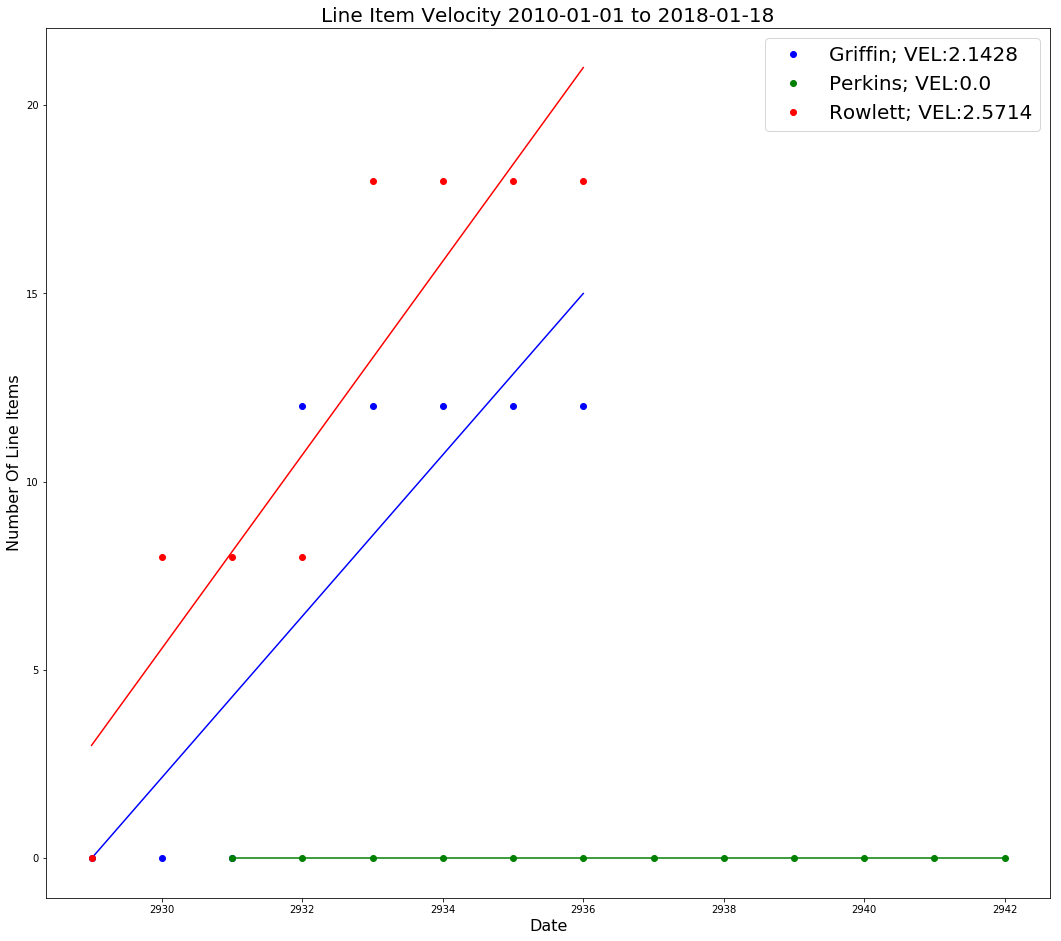

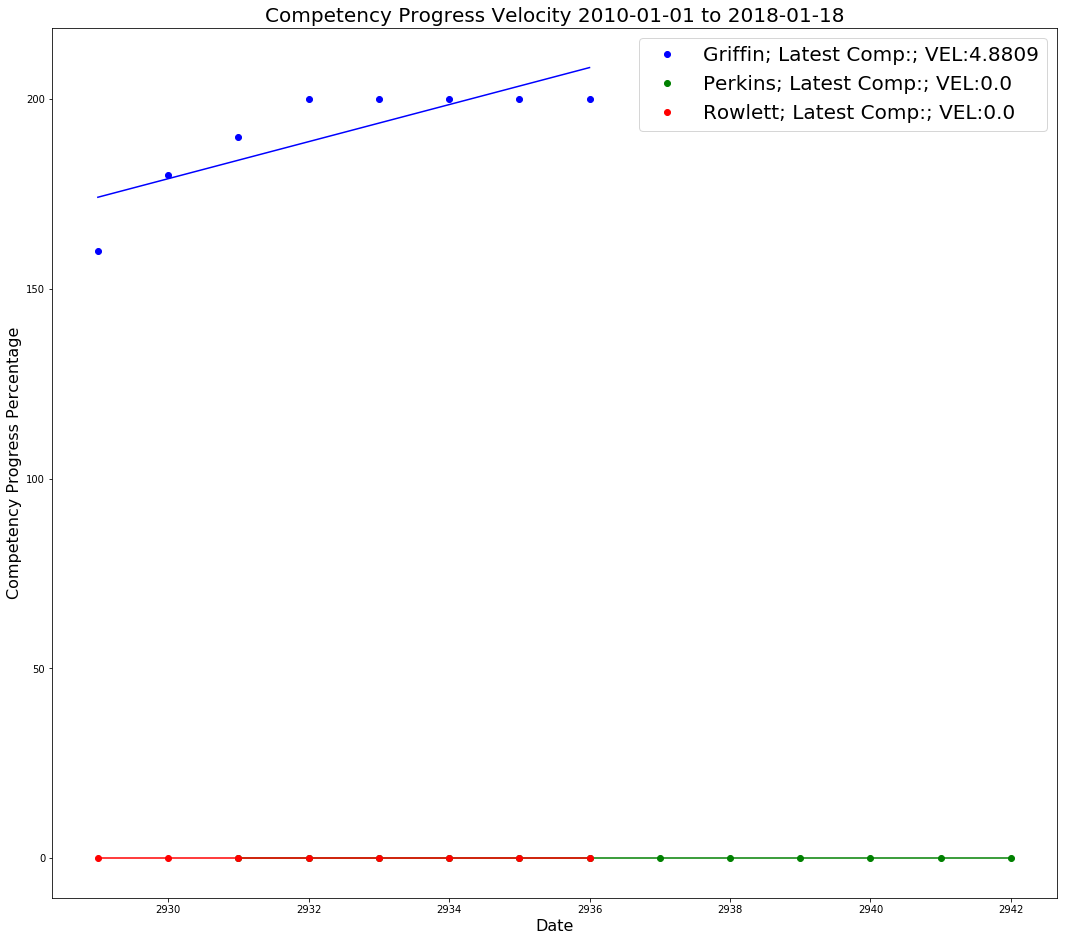

In [6]:
MakePlots()
   

In [7]:
CreateTableOfVelocities()


Line Velocity:	Mean = 1.571	STD = 1.125
Comp Velocity:	Mean = 1.627	STD = 2.301


         NAME          LINE ITEM VELOCITY  COMP PROGRESS VELOCITY
      Griffin               2.1428               4.8809       
      Perkins                0.0                  0.0         
      Rowlett               2.5714                0.0         



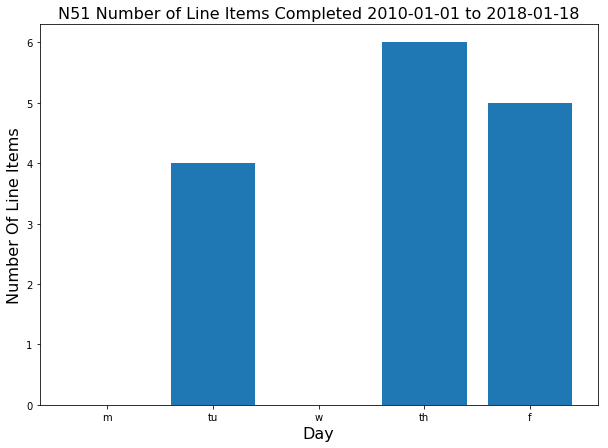

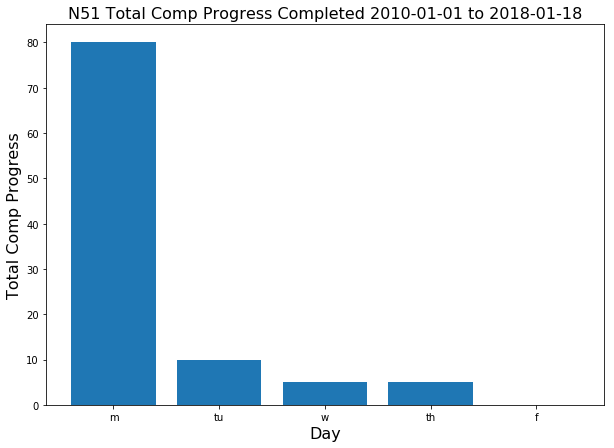

In [8]:
CreateDayOfWeekDistributions()

In [157]:
class TraineeCounts:

    validCCompNames = ['C1', 'C2', 'C3', 'C4']
    ValidPyCompNames = ['Py1', 'Py2']
    ValidAsmCommpNames = ['Asm1', 'Asm2', 'Asm3']
    ValidCapNames = ['Cap']

    cComps = 'C Comps'
    pyComps = 'Python \nComps'
    asmComp = 'Assembly \nComps'
    capProj = 'Capstone \nProject'

    


    def __init__(self, Trainee, HistoricSheet=None):
        self.name = Trainee.name

        self.traineeComps = {TraineeCounts.cComps:0,
                         TraineeCounts.pyComps: 0,
                         TraineeCounts.asmComp: 0,
                         TraineeCounts.capProj: 0}

        self.historicalComps = {TraineeCounts.cComps:0,
                                TraineeCounts.pyComps: 0,
                                TraineeCounts.asmComp: 0,
                                TraineeCounts.capProj: 0}


        self.traineeSections = {'100':0,
                                '101':0,
                                '200':0,
                                '201':0,
                                '202':0,
                                #'203':0,
                                '204':0,
                                'Debug':0} #Same Row as 203

        self.historicSections = {'100':0,
                                '101':0,
                                '200':0,
                                '201':0,
                                '202':0,
                                #'203':0,
                                '204':0,
                                'Debug':0} #Same Row as 203
        
        self.historicCells = None
        self.targetCells = None
        
        
        for record in Trainee.records:
            if record.section != '' and record.section != None and record.section != ' ':
                self.traineeSections[record.section] = self.traineeSections[record.section]+record.numberOfLineItems
                if record.completedComp == 'y':
                    currComp = self.__CurrComp(record)
                    if currComp != 'err':
                        self.traineeComps[currComp] = self.traineeComps[currComp]+1

        if HistoricSheet != None:
            HistoricSheet = HistoricSheet.worksheets()[0]
            self.historicCells = HistoricSheet.get_all_values()
            self.UpdateHistoricCounts(HistoricSheet, self.historicSections)
            self.UpdateHistoricCounts(HistoricSheet, self.historicalComps)




    def __FindNameCell(self, sheet):

        try:
            return  sheet.find(self.name)
        except:
            print("%s not present in Historical Sheet.\n"%self.name)

        return None

    def UpdateHistoricCounts(self, sheet, dictionary):
        nameCellHistorical = TraineeCounts.findPositionOfCell(self.name, self.historicCells)
        
        if nameCellHistorical[0] == -1:
            print("Could not find %s in historical sheet.\n" % self.name)
            return

        tempCellKey = None
        tempCellVal = None

        for key in dictionary.keys():

            
            tempCellKey = TraineeCounts.findPositionOfCell(key, self.historicCells)
            
            if tempCellKey[0] == -1:
                print("%s not found in historic sheet.\n" % key)
                continue
            
            tempCellVal = sheet.cell(nameCellHistorical[0], tempCellKey[1])
            value = ''.join(c for c in tempCellVal.value if c.isalnum())
            #print("key: %s\tvalue: %s"%(key,tempCellVal.value))
            if value == '' or value == None:
                value = '0'
                
            dictionary[key] = int(value)


            

    def UpdateAllHistoricCounts(self, sheet):
        UpdateHistoricCounts(sheet, self.historicSections)
        UpdateHistoricCounts(sheet, self.historicalComps)



    def UpdateJQRTracker(self, TargetSheet):

        TargetSheet = TargetSheet.worksheets()[0]
        self.targetCells = TargetSheet.get_all_values()
        
        nameCellTarget = TraineeCounts.findPositionOfCell(self.name, self.targetCells)
        
        if nameCellTarget[0] == -1:
            print("Could not find %s in historical sheet.\n" % self.name)
            return
        
        tempCellKey = None
        TargetSheet = TargetSheet.worksheets()[0]
        for key in traineeSections.keys():
            
            tempCellKey = TraineeCounts.findPositionOfCell(key, self.targetCells)
            if tempCellKey[0] == -1:
                print("%s not found in target sheet.\n" % key)
                continue


            TargetSheet.update_cell(nameCellTarget[0], tempCellKey[1], traineeSections[key]+historicSections[key])
            
                

        for key in traineeComps.keys()():

            tempCellKey = TraineeCounts.findPositionOfCell(key, self.targetCells)
            if tempCellKey[0] == -1:
                print("%s not found in target sheet.\n" % key)
                continue

            TargetSheet.update_cell(nameCellTarget[0], tempCellKey[1], traineeSections[key]+historicSections[key])
                
    
    @staticmethod
    def findPositionOfCell(value, cells):
        row = 0
        col = 0
        for l in cells:
            col = 0
            for val in l:
                if ''.join(c for c in value if c.isalnum()) == ''.join(c for c in val if c.isalnum()):
                    return (row+1, col+1)
                col = col + 1
            row = row + 1

        return (-1,-1)


    def __CurrComp(self, record):
    
        if record.compentancy in TraineeCounts.validCCompNames:
            return TraineeCounts.cComps
        if record.compentancy in TraineeCounts.validCCompNames:
            return TraineeCounts.pyComps
        if record.compentancy in TraineeCounts.validCCompNames:
            return TraineeCounts.asmComp
        if record.compentancy in TraineeCounts.validCCompNames:
            return TraineeCounts.capProj

        print('%s is an invalid comp name.\n'%record.compentancy)
        return 'err'   

In [15]:
def updateJQRTracker(selfTrackerSheetName = 'JQR Self Progress', 
                     historicalTrackerSheetName = 'Historical Training Tracker', 
                     targetSheetName = 'Training Tracker'):
    
   
    
     
    selfTrackersheet = RetrieveSpreadSheet(spreadSheetName = selfTrackerSheetName)#Default Parameters gets "JQR Self Progress"
    workSheets = selfTrackersheet.worksheets()
    
    #All trainees currently loaded
    allLoadedTrainees = [trainee.name.lower() for trainee in Trainees]
    
    for currWorkSheet in workSheets:
        # todo check that trainee is in list
        if currWorkSheet._title.lower() not in allLoadedTrainees:
            currTrainee = Trainee(currWorkSheet)
            Trainees.append(currTrainee)
            
    
    historicalTrackerSheet = RetrieveSpreadSheet(spreadSheetName = historicalTrackerSheetName)
    
    targetSheet = RetrieveSpreadSheet(spreadSheetName = targetSheetName)
    
    for trainee in Trainees:
        tempCounts = TraineeCounts(trainee, historicalTrackerSheet)
        tempCounts.updateJQRTracker(targetSheet)

In [143]:
selfTrackerSheetName = 'JQR Self Progress' 
historicalTrackerSheetName = 'Historical Training Tracker'
targetSheetName = 'Target Training Tracker'

In [144]:

selfTrackersheet = RetrieveSpreadSheet(spreadSheetName = selfTrackerSheetName)
workSheets = selfTrackersheet.worksheets()

#All trainees currently loaded
allLoadedTrainees = [trainee.name.lower() for trainee in Trainees]

for currWorkSheet in workSheets:
    # todo check that trainee is in list
    if currWorkSheet._title.lower() not in allLoadedTrainees and currWorkSheet._title.lower() not in ['blank', 'example']:
        print("Creating Object For in %s\n" % currWorkSheet._title.lower())
        currTrainee = Trainee(currWorkSheet)
        Trainees.append(currTrainee)


In [145]:
historicalTrackerSheet = RetrieveSpreadSheet(spreadSheetName = historicalTrackerSheetName)
    
targetSheet = RetrieveSpreadSheet(spreadSheetName = targetSheetName)

In [158]:
tempCounts = TraineeCounts(Trainees[4], historicalTrackerSheet)

In [159]:
tempCounts.traineeSections

{'100': 0, '101': 0, '200': 1, '201': 0, '202': 0, '204': 0, 'Debug': 0}

In [160]:
tempCounts.historicSections

{'100': 17, '101': 5, '200': 0, '201': 16, '202': 0, '204': 0, 'Debug': 7}